In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
data = pd.read_csv('data_titanic_proyecto.csv')

In [3]:
data.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N


In [4]:
#feature enginering
sex = np.zeros(len(data))
sex[data['passenger_sex']== 'M'] = 1
sex[data['passenger_sex']== 'F'] = 0
data['passenger_sex'] = sex

data.head()


,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,1.0,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,0.0,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,0.0,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,0.0,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,1.0,N


In [5]:
clase = np.zeros(len(data))
clase[data['passenger_class']== 'Lower'] = 0
clase[data['passenger_class']== 'Upper'] = 1
data['passenger_class'] = clase
survived = np.zeros(len(data))
survived[data['passenger_survived']== 'N'] = 0
survived[data['passenger_survived']== 'Y'] = 1
data['passenger_survived'] = survived
data.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0,0.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,1.0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1.0,0.0,1.0
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0.0,1.0,0.0


In [6]:

data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
Embarked = np.zeros(len(data))
Embarked[data['Embarked']== 'C'] = 1
Embarked[data['Embarked']== 'Q'] = 2
Embarked[data['Embarked']== 'S'] = 3
data['Embarked'] = Embarked
data.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,3.0,0.0,1.0,0.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1.0,1.0,0.0,1.0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0,0.0,0.0,1.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,3.0,1.0,0.0,1.0
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,3.0,0.0,1.0,0.0


In [7]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
#age = np.zeros(len(data))
#age[data['Age']<20] = 1
#age[(data['Age']>=20)&(train['Age']<60)] = 2
#age[(data['Age']>=60)] = 3
#data['Age'] = age
data.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,3.0,0.0,1.0,0.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1.0,1.0,0.0,1.0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0,0.0,0.0,1.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,3.0,1.0,0.0,1.0
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,3.0,0.0,1.0,0.0


In [8]:
eliminar = ['PassengerId','Name', 'Ticket','Cabin']
data.drop(eliminar,axis=1, inplace=True)
data.head()

,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
0,22.0,1,0,7.2500,3.0,0.0,1.0,0.0
1,38.0,1,0,71.2833,1.0,1.0,0.0,1.0
2,26.0,0,0,7.9250,3.0,0.0,0.0,1.0
3,35.0,1,0,53.1000,3.0,1.0,0.0,1.0
4,35.0,0,0,8.0500,3.0,0.0,1.0,0.0


In [9]:
#feature selection age 
x = data.iloc[:,0:7]  
y = data.iloc[:,-1] 

In [10]:
#separacion datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.30, random_state=42)


In [11]:
train = X_train.copy()
train["y"] = y_train
train
def pc():
    counts = train["y"].value_counts().to_dict()
    priors = {(k, v/len(y_train)) for k, v in counts.items()}
    return priors
pc()

{(0.0, 0.6193029490616622), (1.0, 0.3806970509383378)}

In [12]:
import math
def mediaVarianza():
    media_varianza = {}
    for c in train["y"].unique():
        filtro= train[(train['y'] == c)]
        mv = {}
        for xi in ["Age","SibSp","Parch","Fare","Embarked","passenger_class","passenger_sex"]:
            mv[xi] = []
            mv[xi].append(filtro[xi].mean())
            mv[xi].append(
                math.pow(filtro[xi].std(), 2))
        media_varianza[c] = mv
    return media_varianza
media_varianza = mediaVarianza()
def pdf(x, media, varianza):
    e = math.exp(-(math.pow(x - media, 2) / (2 * varianza)))
    return (1 / (math.sqrt(2 * math.pi * varianza))) * e


In [217]:

def predict():
    predictions = {}
    for _, row in X_test.iterrows():
        results = {}
        for k, v in pc():
            p = 0
            for xi in ["Age","SibSp","Parch","Fare","Embarked","passenger_class","passenger_sex"]:
                prob = pdf(row[xi], media_varianza[k][xi][0], media_varianza[k][xi][1])
                if prob > 0:
                    p += math.log(prob)
            results[k] = math.log(v) + p
        predictions[_] = max([key for key in results.keys() if results[key] == results[max(results, key=results.get)]])
    return predictions


In [218]:
def accurracy(predictions):
    correct = 0
    for i, t in X_test.iterrows():
        if y_test[i] == predictions[i]:
            correct += 1
    return (correct / len(X_test)) * 100.0
accurracy(predict())

79.27170868347339

In [214]:
#onehotcoding
a = np.unique(y_train, return_inverse=1)[1]
Y = (a.ravel()[:,None] == np.arange(a.max()+1)).astype(int)



In [223]:
m,n = X_train.shape
epochs = 1000
tf.reset_default_graph()
with tf.name_scope('datos_entrenamiento'):
    x = tf.placeholder(tf.float32, [None, n], name = "X") 
    y = tf.placeholder(tf.float32, [None, 2], name = "Y") 
with tf.name_scope('parametros'):
    W = tf.Variable(tf.zeros([n,2]), name = "W") 
    b = tf.Variable(tf.zeros([2]), name = "B")
with tf.name_scope('modelo'):
    y_ = tf.matmul(x, W) + b
    prediction = tf.nn.sigmoid(y_)
with tf.name_scope('cross_entropy'):
    cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits( logits = y_, labels = y))
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy) 
    #tf.summary.scalar('cost',cross_entropy)
with tf.name_scope('accuracy'):
    correct_prediction = tf.to_float(tf.greater(prediction, 0.5))
    accuracy = tf.reduce_mean(tf.to_float(tf.equal(y, correct_prediction)))
    #tf.summary.scalar('accuracy',accuracy)

#summaries = tf.summary.merge_all()

In [230]:
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    batch_size = 10
    batchs = int(np.around(len(X_train)/batch_size))
    batchs
    for i in range(epochs):
        i0 = 0
        i1 = batch_size-1
        for batch in range(batchs):
            x_batch = X_train[i0:i1]
            y_batch = Y[i0:i1]
            optimizer,cost,accuracy_ = sess.run([train_step, cross_entropy,accuracy], feed_dict={x: x_batch,
                                           y: y_batch})
            if (i%100==0 and batch==10):
                print ('Epoch: ',i,'Batch:' ,batch, ' accuracy: ', accuracy_,' cost:',cost)
            i0 = i0+batch_size
            i1 = i1+batch_size


    #print ("Train Accuracy:", sess.run(accuracy, feed_dict={x: X_train, y: y_train}))

    save_path = saver.save(sess, "session.ckpt")
#summary_writer.close()

Epoch:  0 Batch: 10  accuracy:  0.5555556  cost: 0.6979588
Epoch:  100 Batch: 10  accuracy:  0.6666667  cost: 0.4564149
Epoch:  200 Batch: 10  accuracy:  0.7777778  cost: 0.37568173
Epoch:  300 Batch: 10  accuracy:  0.8888889  cost: 0.3201304
Epoch:  400 Batch: 10  accuracy:  0.8888889  cost: 0.2919442
Epoch:  500 Batch: 10  accuracy:  0.8888889  cost: 0.27144682
Epoch:  600 Batch: 10  accuracy:  0.8888889  cost: 0.25396648
Epoch:  700 Batch: 10  accuracy:  0.8888889  cost: 0.23858601
Epoch:  800 Batch: 10  accuracy:  0.8888889  cost: 0.22509108
Epoch:  900 Batch: 10  accuracy:  0.8888889  cost: 0.21335888


In [134]:
label_dict = {
        0: 'No Sobrevivió',
        1: 'Sobrevivió',
}
def RegresionLogisticaTrie(X):
    with tf.Session() as sess:
        saver.restore(sess, "session.ckpt")
        predict = sess.run([prediction], feed_dict = {x: X})
        categoria = np.argmax(predict)
        #print(predict,categoria)
        print(label_dict[categoria] ,' con probabilidad ' , str(round(np.max(predict) * 100,2)) , '%')
RegresionLogisticaTrie(X_validate[3:4])
y_validate[3:4]


INFO:tensorflow:Restoring parameters from session.ckpt
Sobrevivió  con probabilidad  99.96 %


618    1.0
Name: passenger_survived, dtype: float64

In [182]:
#accuracy error precicion recaall f1score
def RegresionLogistica(X):
    with tf.Session() as sess:
        saver.restore(sess, "session.ckpt")
        predict = sess.run([prediction], feed_dict = {x: X})
        categoria = np.array(predict).argmax(-1)
        return categoria


In [219]:

from sklearn import svm
vectorMachine = svm.SVC(kernel='linear', learning_rate=0.01)  
vectorMachine.fit(X_train, y_train) 
y_svm = vectorMachine.predict(X_validate)

print(y_svm, y_validate)

TypeError: __init__() got an unexpected keyword argument 'learning_rate'

In [213]:
from sklearn import tree
arbol = tree.DecisionTreeClassifier()
arbol.fit(X_train, y_train) 
y_tree = arbol.predict(X_validate)


In [211]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from pandas import DataFrame
logistica = RegresionLogistica(X_validate)
y_logistica = pd.Series(logistica.ravel())

modelos = list()
accuracies = list()
f1s = list()
precisions = list()
recalls = list()

def saveModel(modelo, y, y_pred):
    metricas = metrics(y, y_pred)
    modelos.append(modelo)
    accuracies.append(metricas['accuracy'])
    f1s.append(metricas['f1'])
    precisions.append(metricas['precision'])
    recalls.append(metricas['recall'])
def modelToCSV():
        Exp = {'Modelo':modelos,
        'Accuracy': accuracies,
        'F1': f1s,
        'Precision': precisions,
        'Recall': recalls
        }
        df = DataFrame(Exp)
        export_csv = df.to_csv ('export_dataframe.csv', index = None, header=True) 


def metrics (y,y_pred):
    accuracy = accuracy_score(y, y_pred )
    f1 = f1_score(y, y_pred, average='macro') 
    precision = precision_score(y, y_pred, average='macro') 
    recall = recall_score(y, y_pred, average='macro') 
    return {'accuracy':accuracy,'f1':f1,'precision':precision,'recall':recall}

saveModel('Regresion Logistica',y_validate,y_logistica)
saveModel('SVM',y_validate,y_svm)
saveModel('Arbol Decision',y_validate,y_tree)

modelToCSV()

INFO:tensorflow:Restoring parameters from session.ckpt


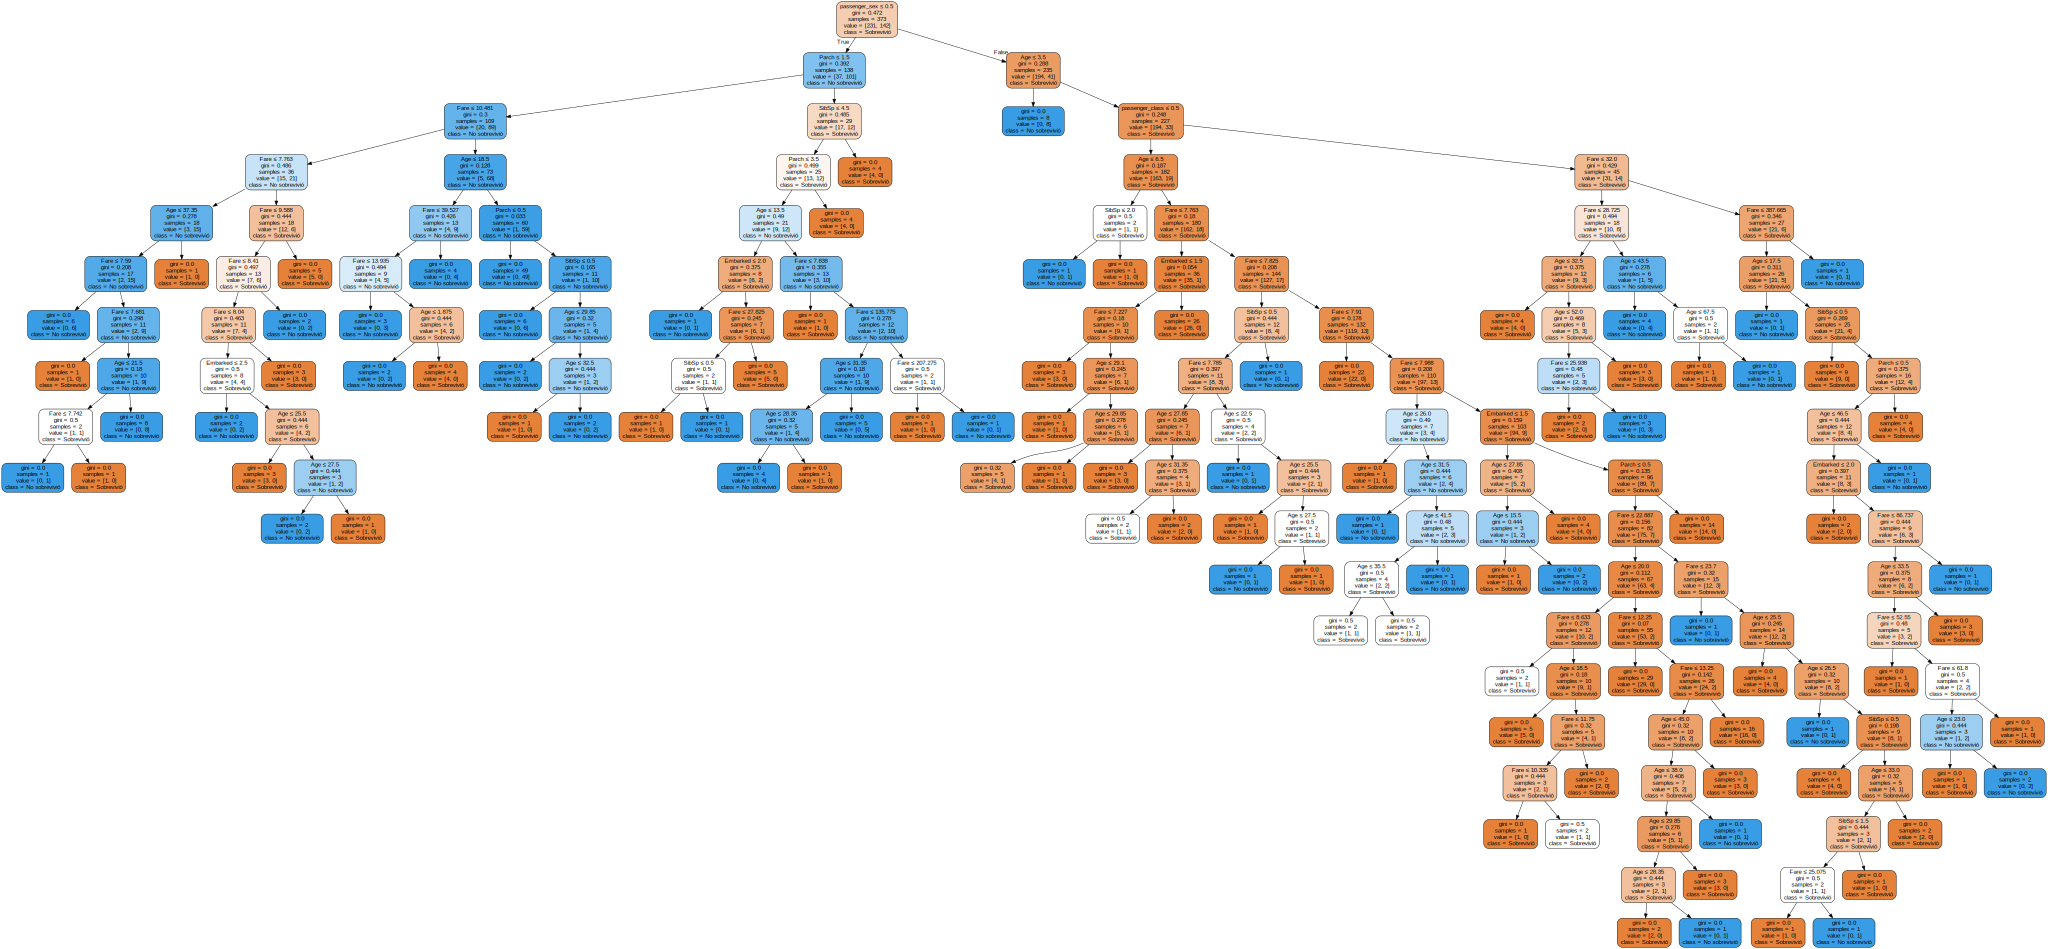

In [129]:
#PRUEBA 

y_tree = arbol.predict(X_validate[:1])

import graphviz 
dot_data = tree.export_graphviz(arbol, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("titanic") 
dot_data = tree.export_graphviz(arbol, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=["Sobrevivió","No sobrevivió"],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [130]:
#import sys
#!conda install --yes --prefix  {sys.prefix} python-graphviz